### **Task 2 - Customers & Orders**

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Step 1: Create Spark Session
spark = SparkSession.builder.appName("DataFrame-Exercises").getOrCreate()

In [2]:
customers_data = [
    (1, "Rahul Sharma", "Bangalore", 28),
    (2, "Priya Singh", "Delhi", 32),
    (3, "Aman Kumar", "Hyderabad", 25),
    (4, "Sneha Reddy", "Chennai", 35),
    (5, "Arjun Mehta", "Mumbai", 30),
    (6, "Divya Nair", "Delhi", 29)
]
customers_cols = ["customer_id", "name", "city", "age"]
customers_df = spark.createDataFrame(customers_data, customers_cols)

# Orders Data
orders_data = [
    (101, 1, "Laptop", 55000),
    (102, 2, "Mobile", 25000),
    (103, 1, "Headphones", 3000),
    (104, 3, "Chair", 5000),
    (105, 5, "Book", 700),
    (106, 2, "Tablet", 20000),
    (107, 6, "Shoes", 2500),
    (108, 7, "Camera", 30000)  # Order with non-existent customer
]
orders_cols = ["order_id", "customer_id", "product", "amount"]
orders_df = spark.createDataFrame(orders_data, orders_cols)

print("=== Customers Data ===")
customers_df.show()
print("=== Orders Data ===")
orders_df.show()

=== Customers Data ===
+-----------+------------+---------+---+
|customer_id|        name|     city|age|
+-----------+------------+---------+---+
|          1|Rahul Sharma|Bangalore| 28|
|          2| Priya Singh|    Delhi| 32|
|          3|  Aman Kumar|Hyderabad| 25|
|          4| Sneha Reddy|  Chennai| 35|
|          5| Arjun Mehta|   Mumbai| 30|
|          6|  Divya Nair|    Delhi| 29|
+-----------+------------+---------+---+

=== Orders Data ===
+--------+-----------+----------+------+
|order_id|customer_id|   product|amount|
+--------+-----------+----------+------+
|     101|          1|    Laptop| 55000|
|     102|          2|    Mobile| 25000|
|     103|          1|Headphones|  3000|
|     104|          3|     Chair|  5000|
|     105|          5|      Book|   700|
|     106|          2|    Tablet| 20000|
|     107|          6|     Shoes|  2500|
|     108|          7|    Camera| 30000|
+--------+-----------+----------+------+



### **Basic Operations**

In [3]:
# 1. Select only name and city
customers_df.select("name", "city").show()

# 2. Filter customers older than 30
customers_df.filter(customers_df.age > 30).show()

# 3. Count how many customers are from "Delhi"
customers_df.filter(customers_df.city == "Delhi").count()

# 4. Find distinct cities in the customer list
customers_df.select("city").distinct().show()


+------------+---------+
|        name|     city|
+------------+---------+
|Rahul Sharma|Bangalore|
| Priya Singh|    Delhi|
|  Aman Kumar|Hyderabad|
| Sneha Reddy|  Chennai|
| Arjun Mehta|   Mumbai|
|  Divya Nair|    Delhi|
+------------+---------+

+-----------+-----------+-------+---+
|customer_id|       name|   city|age|
+-----------+-----------+-------+---+
|          2|Priya Singh|  Delhi| 32|
|          4|Sneha Reddy|Chennai| 35|
+-----------+-----------+-------+---+

+---------+
|     city|
+---------+
|Bangalore|
|    Delhi|
|Hyderabad|
|  Chennai|
|   Mumbai|
+---------+



### **Aggregations**

In [4]:
from pyspark.sql import functions as F

# 5. Average age of customers
customers_df.agg(F.avg("age")).show()

# 6. Maximum and minimum order amount
orders_df.agg(F.max("amount"), F.min("amount")).show()

# 7. Count number of orders placed by each customer
orders_df.groupBy("customer_id").count().show()

# 8. Total spending of each customer
orders_df.groupBy("customer_id").agg(F.sum("amount").alias("total_spent")).show()


+------------------+
|          avg(age)|
+------------------+
|29.833333333333332|
+------------------+

+-----------+-----------+
|max(amount)|min(amount)|
+-----------+-----------+
|      55000|        700|
+-----------+-----------+

+-----------+-----+
|customer_id|count|
+-----------+-----+
|          1|    2|
|          3|    1|
|          2|    2|
|          7|    1|
|          6|    1|
|          5|    1|
+-----------+-----+

+-----------+-----------+
|customer_id|total_spent|
+-----------+-----------+
|          1|      58000|
|          3|       5000|
|          2|      45000|
|          7|      30000|
|          6|       2500|
|          5|        700|
+-----------+-----------+



### **Joins**

In [5]:
# 9. Inner join (only matching customers)
customers_df.join(orders_df, "customer_id", "inner").show()

# 10. Left join (all customers, even without orders)
customers_df.join(orders_df, "customer_id", "left").show()

# 11. Customers who never placed an order
customers_df.join(orders_df, "customer_id", "left") \
            .filter(orders_df.order_id.isNull()).show()

# 12. Orders that belong to non-existent customers
orders_df.join(customers_df, "customer_id", "left") \
         .filter(customers_df.customer_id.isNull()).show()


+-----------+------------+---------+---+--------+----------+------+
|customer_id|        name|     city|age|order_id|   product|amount|
+-----------+------------+---------+---+--------+----------+------+
|          1|Rahul Sharma|Bangalore| 28|     101|    Laptop| 55000|
|          1|Rahul Sharma|Bangalore| 28|     103|Headphones|  3000|
|          2| Priya Singh|    Delhi| 32|     102|    Mobile| 25000|
|          2| Priya Singh|    Delhi| 32|     106|    Tablet| 20000|
|          3|  Aman Kumar|Hyderabad| 25|     104|     Chair|  5000|
|          5| Arjun Mehta|   Mumbai| 30|     105|      Book|   700|
|          6|  Divya Nair|    Delhi| 29|     107|     Shoes|  2500|
+-----------+------------+---------+---+--------+----------+------+

+-----------+------------+---------+---+--------+----------+------+
|customer_id|        name|     city|age|order_id|   product|amount|
+-----------+------------+---------+---+--------+----------+------+
|          1|Rahul Sharma|Bangalore| 28|     10

### **Sorting & Grouping**

In [6]:
# 13. Customers ordered by age (descending)
customers_df.orderBy(customers_df.age.desc()).show()

# 14. Top 3 highest order amounts
orders_df.orderBy(orders_df.amount.desc()).limit(3).show()

# 15. Group customers by city and find average age
customers_df.groupBy("city").agg(F.avg("age")).show()

# 16. Group orders by product and find total sales amount
orders_df.groupBy("product").agg(F.sum("amount").alias("total_sales")).show()


+-----------+------------+---------+---+
|customer_id|        name|     city|age|
+-----------+------------+---------+---+
|          4| Sneha Reddy|  Chennai| 35|
|          2| Priya Singh|    Delhi| 32|
|          5| Arjun Mehta|   Mumbai| 30|
|          6|  Divya Nair|    Delhi| 29|
|          1|Rahul Sharma|Bangalore| 28|
|          3|  Aman Kumar|Hyderabad| 25|
+-----------+------------+---------+---+

+--------+-----------+-------+------+
|order_id|customer_id|product|amount|
+--------+-----------+-------+------+
|     101|          1| Laptop| 55000|
|     108|          7| Camera| 30000|
|     102|          2| Mobile| 25000|
+--------+-----------+-------+------+

+---------+--------+
|     city|avg(age)|
+---------+--------+
|Bangalore|    28.0|
|    Delhi|    30.5|
|Hyderabad|    25.0|
|  Chennai|    35.0|
|   Mumbai|    30.0|
+---------+--------+

+----------+-----------+
|   product|total_sales|
+----------+-----------+
|     Chair|       5000|
|    Laptop|      55000|
|    Mo

### **SQL Operations**

In [7]:
# 17. Register as temp views
customers_df.createOrReplaceTempView("customers")
orders_df.createOrReplaceTempView("orders")

# 18. Total revenue by city
spark.sql("""
SELECT c.city, SUM(o.amount) AS total_revenue
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.city
""").show()

# 19. Top 2 customers by total spend
spark.sql("""
SELECT c.name, SUM(o.amount) AS total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.name
ORDER BY total_spent DESC
LIMIT 2
""").show()

# 20. Customers who bought products worth more than 20000
spark.sql("""
SELECT c.name, SUM(o.amount) AS total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.name
HAVING total_spent > 20000
""").show()


+---------+-------------+
|     city|total_revenue|
+---------+-------------+
|Bangalore|        58000|
|   Mumbai|          700|
|    Delhi|        47500|
|Hyderabad|         5000|
+---------+-------------+

+------------+-----------+
|        name|total_spent|
+------------+-----------+
|Rahul Sharma|      58000|
| Priya Singh|      45000|
+------------+-----------+

+------------+-----------+
|        name|total_spent|
+------------+-----------+
|Rahul Sharma|      58000|
| Priya Singh|      45000|
+------------+-----------+



 ## **Task - 3 - Work with JSON and CSV files**

### **JSON File**

In [10]:
import json

books_data = [
  {"id": 1, "title": "The AI Revolution", "author": "John Smith", "genre": "Technology", "price": 499, "rating": 4.7, "year": 2023},
  {"id": 2, "title": "Mystery of the Nile", "author": "Sarah Lee", "genre": "Adventure", "price": 350, "rating": 4.2, "year": 2019},
  {"id": 3, "title": "Python for All", "author": "Mike Brown", "genre": "Education", "price": 275, "rating": 4.8, "year": 2021},
  {"id": 4, "title": "Secrets of Space", "author": "Nina Patel", "genre": "Science", "price": 600, "rating": 4.5, "year": 2022},
  {"id": 5, "title": "The Last Kingdom", "author": "Robert White", "genre": "History", "price": 450, "rating": 4.0, "year": 2018},
  {"id": 6, "title": "Mindful Living", "author": "Emma Green", "genre": "Self-Help", "price": 300, "rating": 3.9, "year": 2020},
  {"id": 7, "title": "Future of Energy", "author": "David Clark", "genre": "Science", "price": 550, "rating": 4.6, "year": 2023}
]

# Save the JSON data to a file
with open("books.json", "w") as f:
    json.dump(books_data, f)

print("=== JSON Data Saved to books.json ===")

=== JSON Data Saved to books.json ===


=== Original JSON Data ===
+------------+----------+---+-----+------+-------------------+----+
|      author|     genre| id|price|rating|              title|year|
+------------+----------+---+-----+------+-------------------+----+
|  John Smith|Technology|  1|  499|   4.7|  The AI Revolution|2023|
|   Sarah Lee| Adventure|  2|  350|   4.2|Mystery of the Nile|2019|
|  Mike Brown| Education|  3|  275|   4.8|     Python for All|2021|
|  Nina Patel|   Science|  4|  600|   4.5|   Secrets of Space|2022|
|Robert White|   History|  5|  450|   4.0|   The Last Kingdom|2018|
|  Emma Green| Self-Help|  6|  300|   3.9|     Mindful Living|2020|
| David Clark|   Science|  7|  550|   4.6|   Future of Energy|2023|
+------------+----------+---+-----+------+-------------------+----+


=== Results ===
Books published after 2020:
+-----------+----------+---+-----+------+-----------------+----+
|     author|     genre| id|price|rating|            title|year|
+-----------+----------+---+-----+------+--------

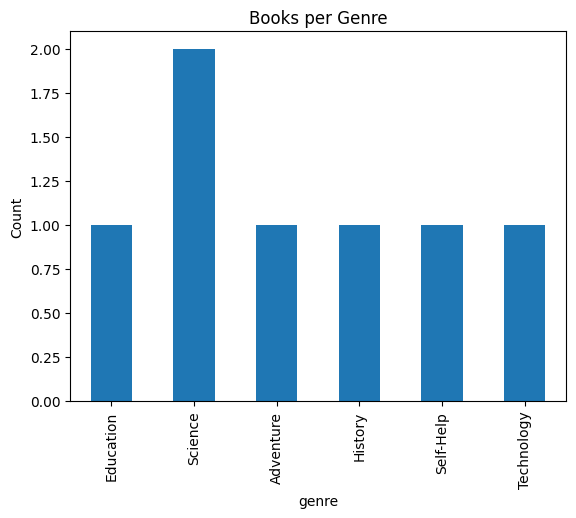

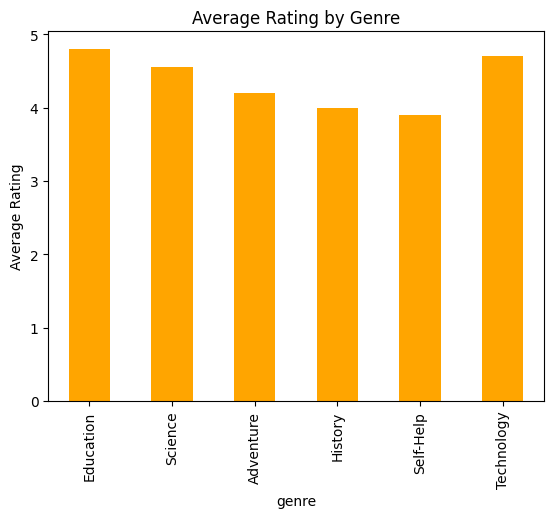

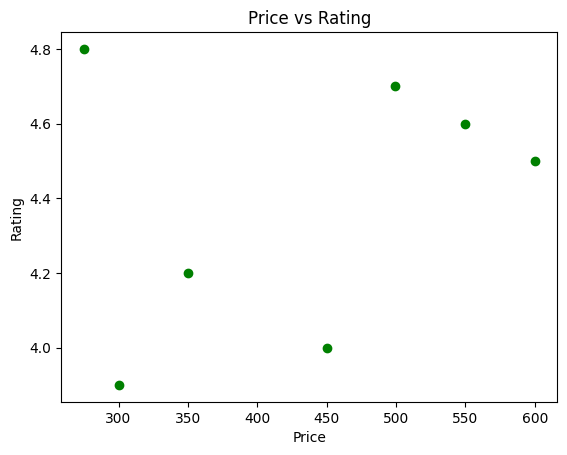

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count
import matplotlib.pyplot as plt

# Create Spark Session
spark = SparkSession.builder.appName("Books-JSON-Visualization").getOrCreate()

# Read JSON file
df_json = spark.read.json("books.json")

print("=== Original JSON Data ===")
df_json.show()

# 1. Filter: Books published after 2020
recent_books = df_json.filter(col("year") > 2020)

# 2. Transformation: Increase price by 10%
updated_prices = df_json.withColumn("updated_price", col("price") * 1.1)

# 3. Aggregation: Average rating
avg_rating = df_json.agg(avg("rating").alias("avg_rating"))

# 4. Max-Min: Most expensive and cheapest book
most_expensive = df_json.orderBy(col("price").desc()).limit(1)
cheapest = df_json.orderBy(col("price").asc()).limit(1)

# 5. Group by genre (count)
genre_counts = df_json.groupBy("genre").agg(count("*").alias("count"))

# 6. Sort by rating (descending)
sorted_by_rating = df_json.orderBy(col("rating").desc())

# 7. Projection: Select only title & author
titles_authors = df_json.select("title", "author")

# 8. Filter: Books above average price
avg_price_val = df_json.agg(avg("price")).collect()[0][0]
above_avg_books = df_json.filter(col("price") > avg_price_val)

print("\n=== Results ===")
print("Books published after 2020:")
recent_books.show()

print("Prices increased by 10%:")
updated_prices.show()

print("Average rating:")
avg_rating.show()

print("Most expensive book:")
most_expensive.show()

print("Cheapest book:")
cheapest.show()

print("Books per genre:")
genre_counts.show()

print("Books sorted by rating:")
sorted_by_rating.show()

print("Titles & Authors:")
titles_authors.show()

print("Books above average price:")
above_avg_books.show()

# Visualization
# Convert necessary PySpark DataFrames to Pandas
pdf_genre_counts = genre_counts.toPandas()
pdf_avg_rating = df_json.select("genre", "rating").groupBy("genre").avg("rating").toPandas()
pdf_price_rating = df_json.select("price", "rating").toPandas()

# 1. Bar chart: Books per genre
pdf_genre_counts.plot(kind="bar", x="genre", y="count", legend=False, title="Books per Genre")
plt.ylabel("Count")
plt.show()

# 2. Bar chart: Average rating per genre
pdf_avg_rating.plot(kind="bar", x="genre", y="avg(rating)", legend=False, color="orange", title="Average Rating by Genre")
plt.ylabel("Average Rating")
plt.show()

# 3. Scatter plot: Price vs Rating
plt.scatter(pdf_price_rating["price"], pdf_price_rating["rating"], color="green")
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()


## **CSV file**

In [14]:
# Write the data to a CSV file
csv_data = """id,title,author,genre,price,rating,year
1,The AI Revolution,John Smith,Technology,499,4.7,2023
2,Mystery of the Nile,Sarah Lee,Adventure,350,4.2,2019
3,Python for All,Mike Brown,Education,275,4.8,2021
4,Secrets of Space,Nina Patel,Science,600,4.5,2022
5,The Last Kingdom,Robert White,History,450,4.0,2018
6,Mindful Living,Emma Green,Self-Help,300,3.9,2020
7,Future of Energy,David Clark,Science,550,4.6,2023
"""

with open("books.csv", "w") as f:
    f.write(csv_data)

print("=== CSV Data Saved to books.csv ===")

=== CSV Data Saved to books.csv ===


=== Original CSV Data ===
+---+-------------------+------------+----------+-----+------+----+
| id|              title|      author|     genre|price|rating|year|
+---+-------------------+------------+----------+-----+------+----+
|  1|  The AI Revolution|  John Smith|Technology|  499|   4.7|2023|
|  2|Mystery of the Nile|   Sarah Lee| Adventure|  350|   4.2|2019|
|  3|     Python for All|  Mike Brown| Education|  275|   4.8|2021|
|  4|   Secrets of Space|  Nina Patel|   Science|  600|   4.5|2022|
|  5|   The Last Kingdom|Robert White|   History|  450|   4.0|2018|
|  6|     Mindful Living|  Emma Green| Self-Help|  300|   3.9|2020|
|  7|   Future of Energy| David Clark|   Science|  550|   4.6|2023|
+---+-------------------+------------+----------+-----+------+----+


=== Results ===
Highly rated books (>4.5):
+---+-----------------+-----------+----------+-----+------+----+
| id|            title|     author|     genre|price|rating|year|
+---+-----------------+-----------+----------+-----

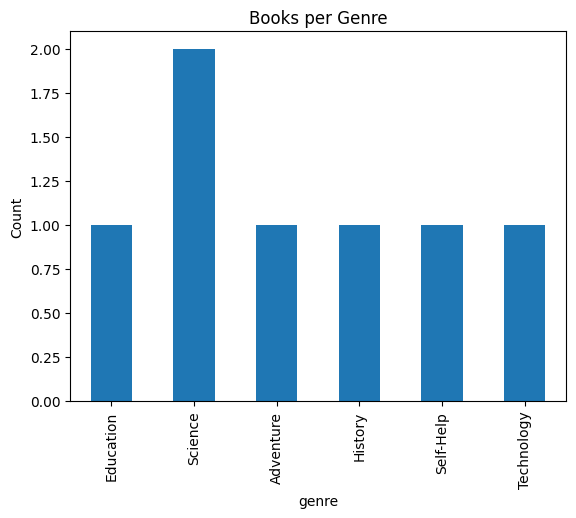

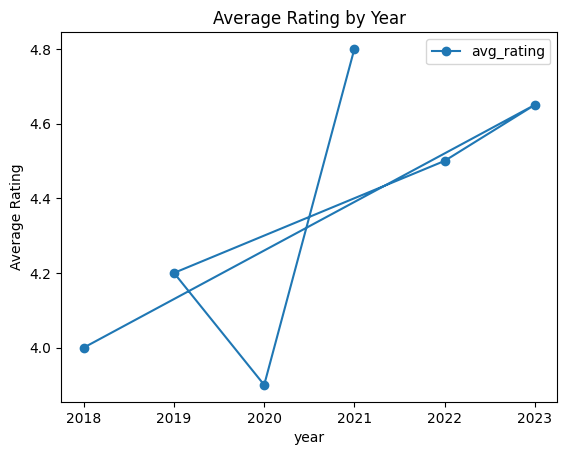

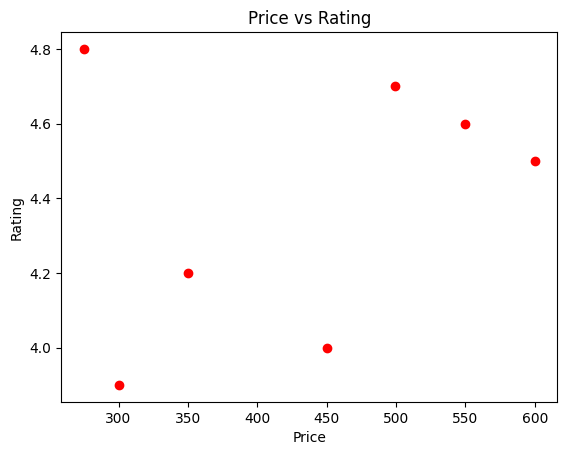

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count
import matplotlib.pyplot as plt

# Create Spark Session
spark = SparkSession.builder.appName("Books-CSV-Visualization").getOrCreate()

# Read CSV file
df_csv = spark.read.option("header", "true").option("inferSchema", "true").csv("books.csv")

print("=== Original CSV Data ===")
df_csv.show()

#  PySpark Operations
# 1. Filter: Books with rating > 4.5
highly_rated = df_csv.filter(col("rating") > 4.5)

# 2. Transformation: Apply 5% discount
discounted = df_csv.withColumn("discounted_price", col("price") * 0.95)

# 3. Aggregation: Average price
avg_price = df_csv.agg(avg("price").alias("avg_price"))

# 4. Count by genre
genre_counts = df_csv.groupBy("genre").agg(count("*").alias("count"))

# 5. Maximum rated book
top_rated = df_csv.orderBy(col("rating").desc()).limit(1)

# 6. Sort by year (newest first)
sorted_by_year = df_csv.orderBy(col("year").desc())

# 7. Projection: Select only title & price
title_price = df_csv.select("title", "price")

# 8. Add new column: Expensive? (price > 400)
expensive_flag = df_csv.withColumn("expensive", col("price") > 400)

# 9. Unique genres
unique_genres = df_csv.select("genre").distinct()

# 10. Average rating by year
avg_rating_by_year = df_csv.groupBy("year").agg(avg("rating").alias("avg_rating"))

# Show Results
print("\n=== Results ===")
print("Highly rated books (>4.5):")
highly_rated.show()

print("Discounted Prices:")
discounted.show()

print("Average price:")
avg_price.show()

print("Books per genre:")
genre_counts.show()

print("Top rated book:")
top_rated.show()

print("Books sorted by year:")
sorted_by_year.show()

print("Title & Price:")
title_price.show()

print("Expensive flag:")
expensive_flag.show()

print("Unique genres:")
unique_genres.show()

print("Average rating by year:")
avg_rating_by_year.show()

#  Visualization
# Convert necessary PySpark DataFrames to Pandas
pdf_genre_counts = genre_counts.toPandas()
pdf_avg_rating_year = avg_rating_by_year.toPandas()
pdf_price_rating = df_csv.select("price", "rating").toPandas()

# 1. Bar chart: Books per genre
pdf_genre_counts.plot(kind="bar", x="genre", y="count", legend=False, title="Books per Genre")
plt.ylabel("Count")
plt.show()

# 2. Line chart: Average rating by year
pdf_avg_rating_year.plot(kind="line", x="year", y="avg_rating", marker="o", title="Average Rating by Year")
plt.ylabel("Average Rating")
plt.show()

# 3. Scatter plot: Price vs Rating
plt.scatter(pdf_price_rating["price"], pdf_price_rating["rating"], color="red")
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()
